## Station 1 ETL
#### Dataset : Wheather Condition


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn
wn.filterwarnings('ignore')

#### Load Dataset

In [2]:
dataset = pd.read_csv('datasets/Weather (2).csv')
dataset.head()

,Date,Minimum temperature +AKk-,Maximum temperature (C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (C),9am relative humidity (+ACU-),9am wind direction,9am wind speed (km/h),3pm Temperature (C),3pm relative humidity (+ACU-),3pm wind direction,3pm wind speed (km/h)
0,1/7/2019,2.5,18.1,0.0,W,15.0,0:33,6.1,77.0,WNW,2,17.6,27.0,NNE,4
1,2/7/2019,3.2,22.4,0.0,NNW,31.0,14:16,7.7,68.0,NW,6,20.0,35.0,NNW,19
2,3/7/2019,6.3,17.4,0.0,S,24.0,13:52,12.4,53.0,SSW,4,14.6,84.0,S,15
3,4/7/2019,11.7,15.8,1.8,SE,30.0,13:21,13.7,81.0,SSW,15,14.4,88.0,SSE,15
4,5/7/2019,11.6,18.1,1.2,ESE,41.0,14:33,13.6,84.0,S,4,16.5,72.0,ESE,24


#### Information about dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               397 non-null    object 
 1   Minimum temperature +AKk-          388 non-null    float64
 2   Maximum temperature (C)            384 non-null    float64
 3   Rainfall (mm)                      397 non-null    float64
 4   Direction of maximum wind gust     396 non-null    object 
 5   Speed of maximum wind gust (km/h)  396 non-null    float64
 6   Time of maximum wind gust          396 non-null    object 
 7   9am Temperature (C)                394 non-null    float64
 8   9am relative humidity (+ACU-)      394 non-null    float64
 9   9am wind direction                 397 non-null    object 
 10  9am wind speed (km/h)              397 non-null    object 
 11  3pm Temperature (C)                393 non-null    float64

#### Description of dataset 

In [4]:
dataset.describe()

,Minimum temperature +AKk-,Maximum temperature (C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (C),9am relative humidity (+ACU-),3pm Temperature (C),3pm relative humidity (+ACU-)
count,388.000000,384.000000,397.000000,396.000000,394.000000,394.000000,393.000000,393.000000
mean,12.581186,24.710156,1.600504,38.638889,17.041878,67.411168,23.408651,44.470738
std,5.346605,6.456424,5.660933,14.103179,5.447155,19.615476,6.479038,22.300128
min,1.400000,13.900000,0.000000,9.000000,6.100000,18.000000,10.200000,6.000000
25%,8.575000,19.375000,0.000000,29.500000,12.500000,57.000000,18.400000,28.000000
50%,11.950000,23.550000,0.000000,37.000000,17.300000,70.000000,22.100000,42.000000
75%,16.800000,28.825000,0.200000,46.000000,20.975000,80.750000,27.800000,59.000000
max,32.000000,43.500000,49.400000,96.000000,34.800000,99.000000,42.500000,96.000000


* Date: Date of the recorded weather data
* Minimum temperature +AKk-: Minimum temperature in Celsius (°C) for the day
* Maximum temperature (C): Maximum temperature in Celsius (°C) for the day
* Rainfall (mm): Amount of rainfall in millimeters (mm) for the day
* Direction of maximum wind gust: Direction of the maximum wind gust recorded for the day
* Speed of maximum wind gust (km/h): Speed of the maximum wind gust recorded in kilometers per hour (km/h) for the day
* Time of maximum wind gust: Time of the day when the maximum wind gust was recorded
* 9am Temperature (C): Temperature in Celsius (°C) recorded at 9am
* 9am relative humidity (+ACU-): Relative humidity recorded at 9am, expressed as a percentage
* 9am wind direction: Wind direction recorded at 9am
* 9am wind speed (km/h): Wind speed recorded at 9am in kilometers per hour (km/h)
* 3pm Temperature (C): Temperature in Celsius (°C) recorded at 3pm
* 3pm relative humidity (+ACU-): Relative humidity recorded at 3pm, expressed as a percentage
* 3pm wind direction: Wind direction recorded at 3pm
* 3pm wind speed (km/h): Wind speed recorded at 3pm in kilometers per hour (km/h)

### Handle the missing values

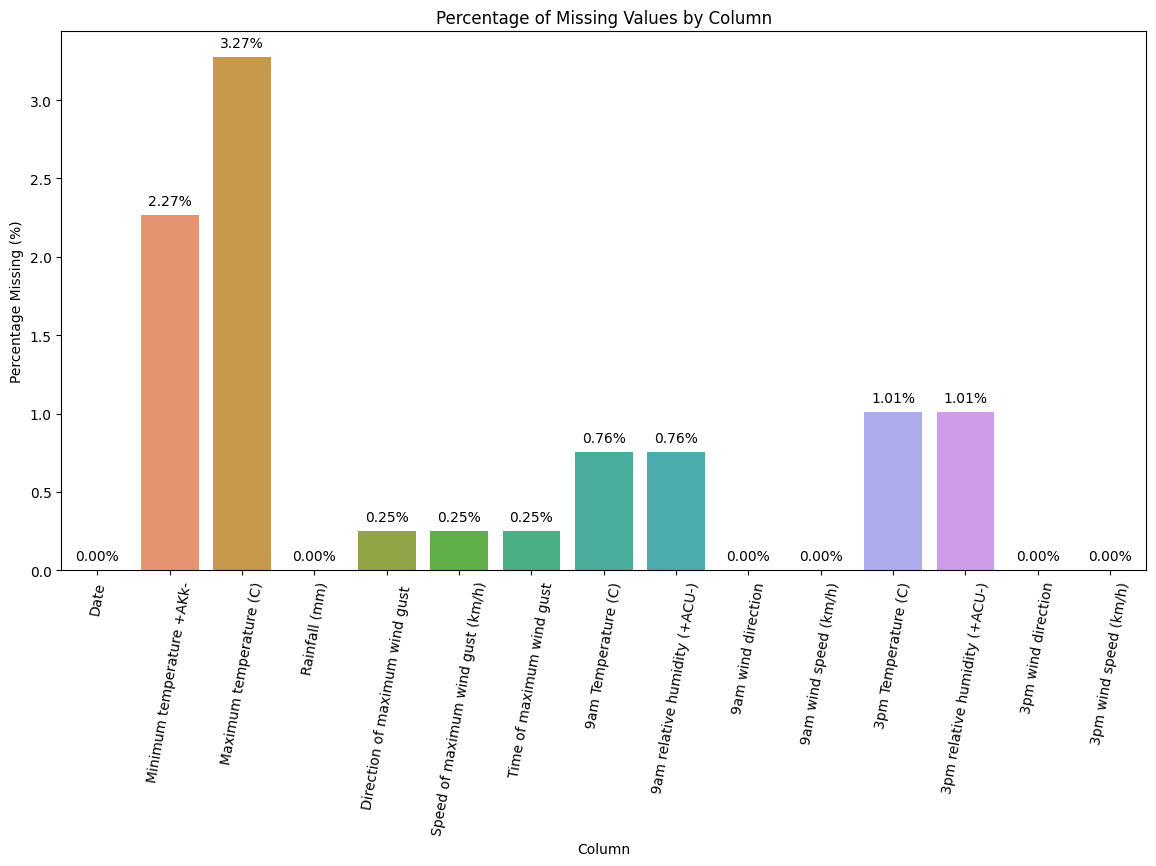

In [5]:
# Calculate the percentage of missing values for each column

missing_pct = dataset.isnull().sum() * 100 / len(dataset)
plt.figure(
    figsize=(14,7)
)
# Create a bar plot of the missing value percentage for each column
ax = sns.barplot(x=missing_pct.index, y=missing_pct)
plt.title("Percentage of Missing Values by Column")
plt.xlabel("Column")
plt.ylabel("Percentage Missing (%)")
plt.xticks(rotation=80)

# Add percentage labels to the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

* This barplot show the percentage of the missing values in every columns

In [6]:
# drop the missing values rows 
dataset = dataset.dropna()
missing_pct = dataset.isnull().sum() * 100 / len(dataset)
missing_pct

Date                                 0.0
Minimum temperature +AKk-            0.0
Maximum temperature (C)              0.0
Rainfall (mm)                        0.0
Direction of maximum wind gust       0.0
Speed of maximum wind gust (km/h)    0.0
Time of maximum wind gust            0.0
9am Temperature (C)                  0.0
9am relative humidity (+ACU-)        0.0
9am wind direction                   0.0
9am wind speed (km/h)                0.0
3pm Temperature (C)                  0.0
3pm relative humidity (+ACU-)        0.0
3pm wind direction                   0.0
3pm wind speed (km/h)                0.0
dtype: float64

## Station 2 Feature Engineering
#### Dataset : Wheather Condition 

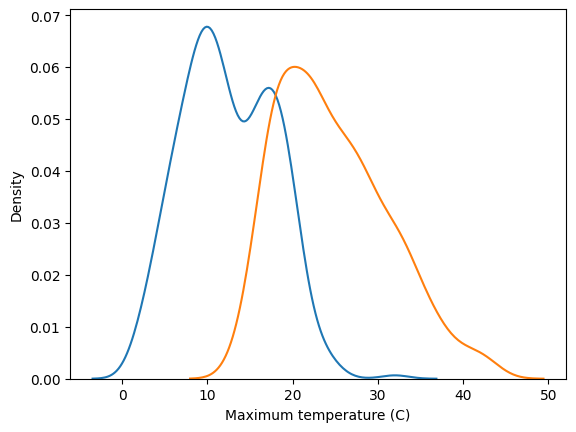

In [39]:
#Distribution graph
sns.distplot(dataset['Minimum temperature +AKk-'],kde=True,hist=False)
sns.distplot(dataset['Maximum temperature (C)'],kde=True,hist=False);

* The distribution plot shows the distribution of values in each column as a histogram, with the x-axis representing the range of values and the y-axis representing the frequency or density of those values. 
* The plot has a curve that shows the estimated probability density function of the data.

### Correlation between features

In [8]:
non_object_columns = dataset.select_dtypes(exclude=['object'])

<Axes: >

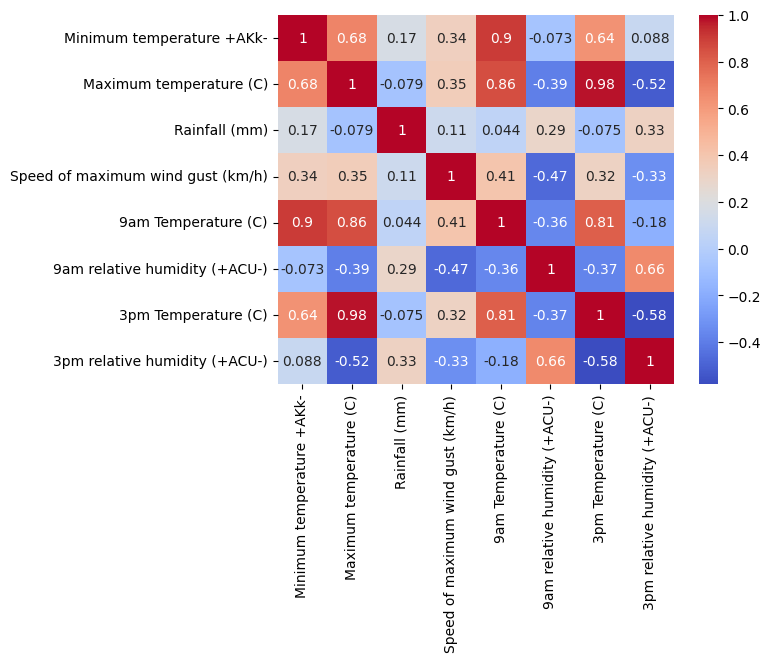

In [9]:
sns.heatmap(non_object_columns.corr(),
            annot=True,cmap='coolwarm')

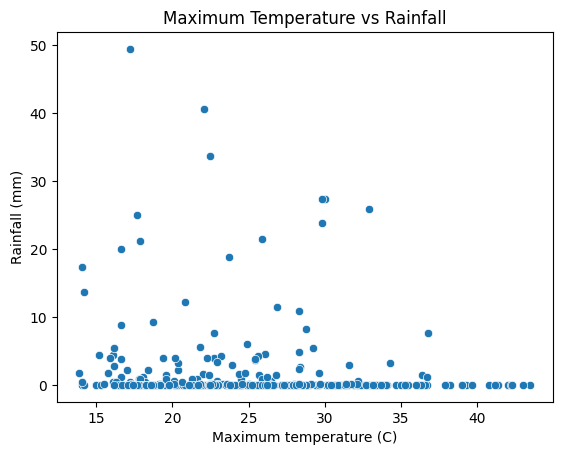

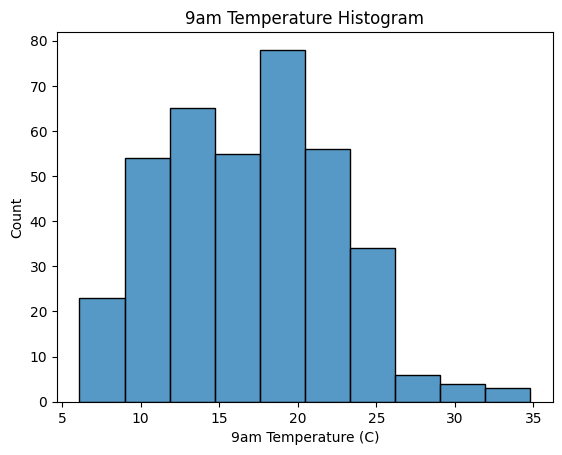

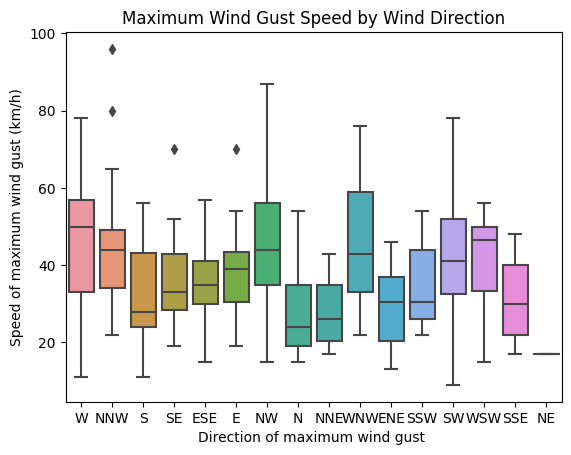

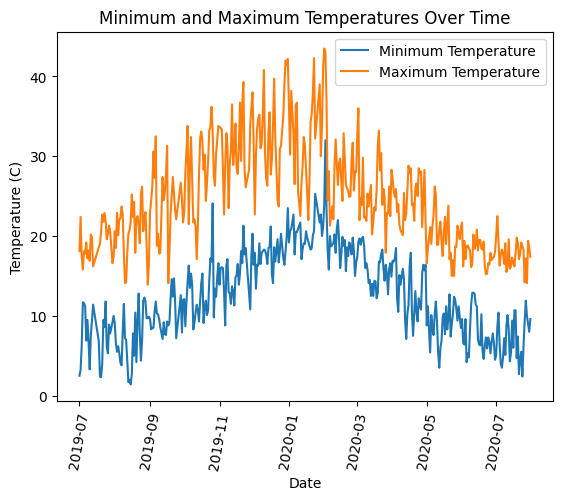

In [37]:
sns.scatterplot(x='Maximum temperature (C)', y='Rainfall (mm)', data=dataset)
plt.title('Maximum Temperature vs Rainfall')
plt.show()

# Histogram of 9am temperature
sns.histplot(data=dataset, x='9am Temperature (C)', bins=10)
plt.title('9am Temperature Histogram')
plt.show()

# Box plot of maximum wind gust speed by wind direction
sns.boxplot(x='Direction of maximum wind gust ', y='Speed of maximum wind gust (km/h)', data=dataset)
plt.title('Maximum Wind Gust Speed by Wind Direction')
plt.show()

# Line plot of minimum and maximum temperatures over time
plt.plot(dataset['Date'], dataset['Minimum temperature +AKk-'], label='Minimum Temperature')
plt.plot(dataset['Date'], dataset['Maximum temperature (C)'], label='Maximum Temperature')
plt.title('Minimum and Maximum Temperatures Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.xticks(rotation=80)
plt.legend()
plt.show()

### Add some new useful features

In [11]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%d/%m/%Y')

In [12]:
dataset['Month'] = dataset['Date'].dt.month

# Create a new column for day of the week
dataset['Day of Week'] = dataset['Date'].dt.dayofweek

In [13]:
dataset['Wind Speed Category'] = pd.cut(dataset['Speed of maximum wind gust (km/h)'], 
                                     bins=[0, 10, 20, 30, 40, 50, 60, 70, 80],
                                     labels=['0-10', '10-20', '20-30', '30-40', 
                                             '40-50', '50-60', '60-70', '70-80'])

# Create a new column for temperature category
dataset['Temperature Category'] = pd.cut(dataset['Maximum temperature (C)'],
                                      bins=[0, 10, 20, 30, 40], 
                                      labels=['0-10', '10-20', '20-30', '30-40'])


In [14]:
# Calculate the total rainfall by month
total_rainfall = dataset.groupby('Month')['Rainfall (mm)'].sum()

# Calculate the average wind speed by wind direction
avg_wind_speed = dataset.groupby('Direction of maximum wind gust ')['Speed of maximum wind gust (km/h)'].mean()


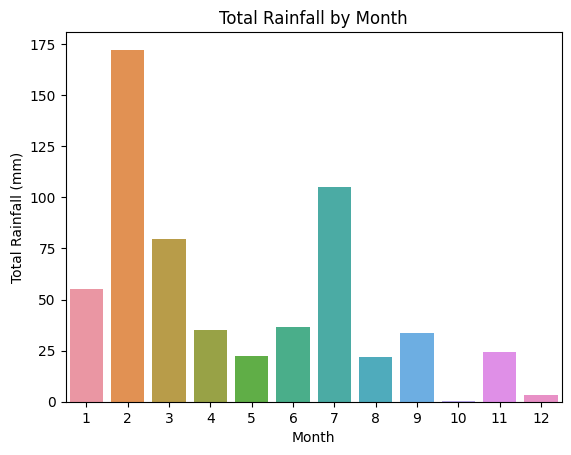

In [15]:
sns.barplot(x=total_rainfall.index, y=total_rainfall.values)
plt.title('Total Rainfall by Month')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.show()

* The plot shows the total rainfall in millimeters for each month of the year, as represented by the height of the bars. 
* The x-axis shows the months of the year, while the y-axis shows the total rainfall in millimeters. 
* The bar plot can be useful for comparing the total rainfall between different months, and identifying any patterns or trends in the data.

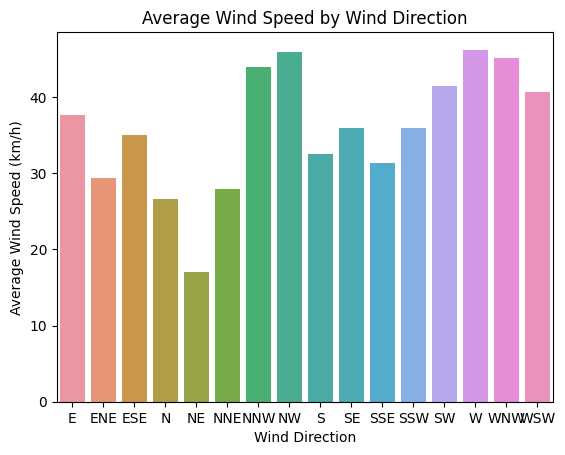

In [16]:
# Create a bar chart of average wind speed by wind direction
sns.barplot(x=avg_wind_speed.index, y=avg_wind_speed.values)
plt.title('Average Wind Speed by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Average Wind Speed (km/h)')
plt.show()

* The plot shows the average wind speed in kilometers per hour for each wind direction, as represented by the height of the bars. 
* The x-axis shows the wind directions, while the y-axis shows the average wind speed in kilometers per hour. 
* The bar plot can be useful for comparing the average wind speed between different wind directions, and identifying any patterns or trends in the data.

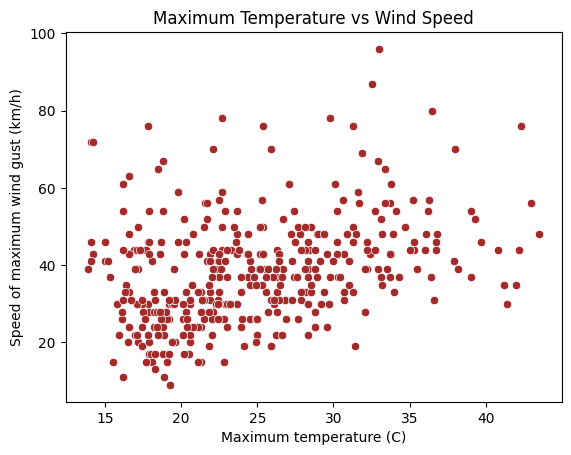

In [17]:
# Create a scatter plot of maximum temperature vs wind speed
sns.scatterplot(x='Maximum temperature (C)', y='Speed of maximum wind gust (km/h)', data=dataset,c='brown')
plt.title('Maximum Temperature vs Wind Speed')
plt.show()

* The scatter plot shows the relationship between the maximum temperature and the speed of the maximum wind gust recorded for each day in the dataset. 
* Each data point represents a single day, with the x-coordinate representing the maximum temperature and the y-coordinate representing the speed of the maximum wind gust. 
* The color of the data points is set to brown. The scatter plot can be useful for identifying any correlation or pattern between the two variables.

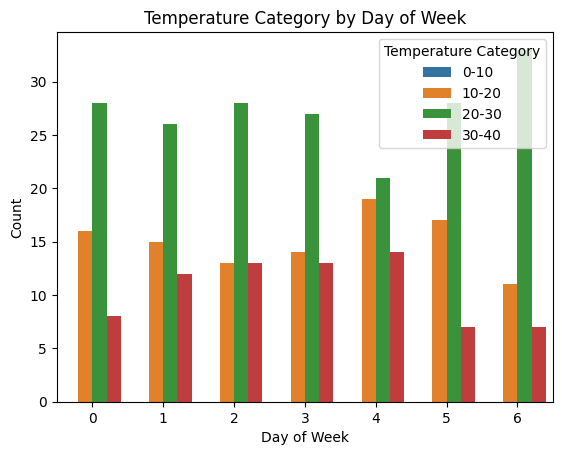

In [18]:
# Create a bar chart of temperature category by day of the week
sns.countplot(x='Day of Week', hue='Temperature Category', data=dataset)
plt.title('Temperature Category by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

* The count plot shows the number of days in each temperature category for each day of the week. 
* The x-axis shows the days of the week, while the y-axis shows the count of days. 
* The bars are grouped by color, with each color representing a different temperature category. 
* The count plot can be useful for comparing the distribution of temperature categories across different days of the week, and identifying any patterns or trends in the data.

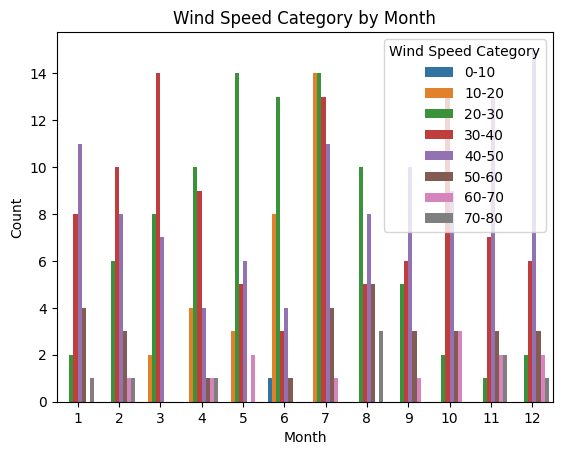

In [19]:
# Create a bar chart of wind speed category by month
sns.countplot(x='Month', hue='Wind Speed Category', data=dataset)
plt.title('Wind Speed Category by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

* The count plot shows the number of days in each wind speed category for each month of the year. 
* The x-axis shows the months of the year, while the y-axis shows the count of days. 
* The bars are grouped by color, with each color representing a different wind speed category. 
* The count plot can be useful for comparing the distribution of wind speed categories across different months of the year, and identifying any patterns or trends in the data.

### Rainfall Prediction

In [20]:
# drop some unneccessary columns
data = dataset.drop(['Date','Wind Speed Category','Temperature Category','Time of maximum wind gust'],axis=1)

In [21]:
# use label encoder to label the directions
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['3pm wind direction'])
data['3pm wind direction label'] = le.fit_transform(data['3pm wind direction'])

In [22]:
le.fit(data['9am wind direction'])
data['9am wind direction label'] = le.fit_transform(data['9am wind direction'])

In [23]:
le.fit(data['Direction of maximum wind gust '])
data['Direction of maximum wind gust label'] = le.fit_transform(data['Direction of maximum wind gust '])

In [24]:
data.head()

,Minimum temperature +AKk-,Maximum temperature (C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),9am Temperature (C),9am relative humidity (+ACU-),9am wind direction,9am wind speed (km/h),3pm Temperature (C),3pm relative humidity (+ACU-),3pm wind direction,3pm wind speed (km/h),Month,Day of Week,3pm wind direction label,9am wind direction label,Direction of maximum wind gust label
0,2.5,18.1,0.0,W,15.0,6.1,77.0,WNW,2,17.6,27.0,NNE,4,7,0,6,15,13
1,3.2,22.4,0.0,NNW,31.0,7.7,68.0,NW,6,20.0,35.0,NNW,19,7,1,7,8,6
2,6.3,17.4,0.0,S,24.0,12.4,53.0,SSW,4,14.6,84.0,S,15,7,2,9,12,8
3,11.7,15.8,1.8,SE,30.0,13.7,81.0,SSW,15,14.4,88.0,SSE,15,7,3,11,12,9
4,11.6,18.1,1.2,ESE,41.0,13.6,84.0,S,4,16.5,72.0,ESE,24,7,4,3,9,2


In [25]:
Direction_label = data[['Direction of maximum wind gust ','Direction of maximum wind gust label',
      '3pm wind direction','3pm wind direction label',
     '9am wind direction','9am wind direction label']]
Direction_label.head()

,Direction of maximum wind gust,Direction of maximum wind gust label,3pm wind direction,3pm wind direction label,9am wind direction,9am wind direction label
0,W,13,NNE,6,WNW,15
1,NNW,6,NNW,7,NW,8
2,S,8,S,9,SSW,12
3,SE,9,SSE,11,SSW,12
4,ESE,2,ESE,3,S,9


In [26]:
data = data.drop(['Direction of maximum wind gust ','3pm wind direction','9am wind direction'],axis=1)

In [27]:
data['9am wind speed (km/h)'] = data['9am wind speed (km/h)'].replace('Calm',None)

In [28]:
data['9am wind speed (km/h)'] = data['9am wind speed (km/h)'].fillna(data['9am wind speed (km/h)'].median)

In [29]:
data['3pm wind speed (km/h)'] = data['3pm wind speed (km/h)'].replace('Calm',None)
data['3pm wind speed (km/h)'] = data['3pm wind speed (km/h)'].fillna(data['3pm wind speed (km/h)'].median)

In [30]:
data = data.drop(['3pm wind speed (km/h)','9am wind speed (km/h)'],axis=1)

In [31]:
data

,Minimum temperature +AKk-,Maximum temperature (C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (C),9am relative humidity (+ACU-),3pm Temperature (C),3pm relative humidity (+ACU-),Month,Day of Week,3pm wind direction label,9am wind direction label,Direction of maximum wind gust label
0,2.5,18.1,0.0,15.0,6.1,77.0,17.6,27.0,7,0,6,15,13
1,3.2,22.4,0.0,31.0,7.7,68.0,20.0,35.0,7,1,7,8,6
2,6.3,17.4,0.0,24.0,12.4,53.0,14.6,84.0,7,2,9,12,8
3,11.7,15.8,1.8,30.0,13.7,81.0,14.4,88.0,7,3,11,12,9
4,11.6,18.1,1.2,41.0,13.6,84.0,16.5,72.0,7,4,3,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,11.9,17.2,49.4,50.0,14.2,84.0,14.2,94.0,7,0,15,8,7
393,10.0,14.1,17.4,41.0,11.1,98.0,13.1,92.0,7,1,8,8,7
394,9.0,19.4,4.0,20.0,12.2,99.0,18.7,53.0,7,2,14,15,8
395,8.0,18.6,0.0,28.0,11.2,83.0,16.1,51.0,7,3,9,14,8


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 0 to 396
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Minimum temperature +AKk-             378 non-null    float64
 1   Maximum temperature (C)               378 non-null    float64
 2   Rainfall (mm)                         378 non-null    float64
 3   Speed of maximum wind gust (km/h)     378 non-null    float64
 4   9am Temperature (C)                   378 non-null    float64
 5   9am relative humidity (+ACU-)         378 non-null    float64
 6   3pm Temperature (C)                   378 non-null    float64
 7   3pm relative humidity (+ACU-)         378 non-null    float64
 8   Month                                 378 non-null    int32  
 9   Day of Week                           378 non-null    int32  
 10  3pm wind direction label              378 non-null    int64  
 11  9am wind direction label

In [33]:
# split the dataset into x and y 
x = data.drop('Rainfall (mm)',axis=1)
y = data['Rainfall (mm)']

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [35]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=1000)
model2.fit(x,y)

RandomForestRegressor(n_estimators=1000)

In [38]:
acc = model2.score(x_test,y_test)
print('The accuracy of the model is ',acc*100,'%')

The accuracy of the model is  91.69236202001515 %
